## Social Preformance Estimator // Creating, Training, and Validating the model

### Author: Greta Perez-Haiek || As part of ML Engineering @ Rensselaer Polytechnic Institute

The purpose of this python file is to create a CNN regression architecture and train it upon the data ("X_feature_vector_data.txt" and "y_likes_data.txt" files) wrangled from "Creating Dataset [1]" python file. CNN regression, after consulting the literature review contained in the "literature Review" folder, is deemed to be the best way to predict the number of "likes" from abstract image data. 

First, data stored in the text files will be imported as X and y variables. For this model, we are using a 80/20 validation split to train and test the data. This means that approximately 80% of the data will be used for training purposes, and 20% of the data will be used for validation purposes.

In [70]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
import matplotlib.pyplot as plt

#Loads data from textfiles!
X = np.loadtxt('Data/X_feature_vector_data.txt') #This correctly generates the data!
y = np.loadtxt("Data/y_likes_data.txt", comments='#', delimiter=":") 
y = y[:, 1] #y[:, 1] = likes!

X = X.reshape(X.shape[0], X.shape[1], 1, 1) #reshapes the "X" data....

#create testing and training sets!
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Success! Data properly split!")
print("Size of training data is...", X_train[:,1].size)
print("Size of testing data is...", X_test[:,1].size)

Success! Data properly split!
Size of training data is... 148
Size of testing data is... 37


We will also be using Tensorflow Keras to create our neural network. The following neural network model to be used is a Convolutional Neural Network (CNN), specifically, a regression type. With reference to the various literature data, Convolutional Neural Networks are commonly used in computer vision applications and are an excellent way to make predictions based on image data alone. Regression models are known to scale testing data against training data, and then estiamte where the testing data occurs on the training data trends (and what their associated target value will be).

The specific CNN Architecture we will use is vaguely inspired by Google's Inception-v3 AI (see Literature Review for PDF of the paper). Of course, implimenting the entire AI model architecture would be complicated and (frankly) "over-kill" for the type of challenge at hand. Nevertheless, the inspiration of layering "Covolutional Layers,"Max pooling" layers, "Dense", "Flatten", and "Drop out layers" comes from Inception-V3's complex (but elegant) architecture, and the use of these specific layers will be used in my own architecture in my own simplified model.

**IMPORTANT NOTE**: As of 4/1/2024, my model (clearly) is not working right now. The error shown below would potentially be resolved through data massaging. I plan on showing the accuracy in terms of "mean squared error," and potentially impliment other methods to see whether they produce more optimal results (such as K-means Regression, as I read in a paper "Prediction of image popularity over time on social media networks" (see Literature Review folder for PDF) that it might be possible to use K-Means to compose regression tasks. 

In [71]:
tf.keras.backend.clear_session() #clears model every reload

model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape = (X_train.shape))) #2D Conv w/ 64 filters, size (5, 5), ReLU Activation

model.add(MaxPooling2D(pool_size=(2, 2))) #max pooling layer of size (2, 2)

model.add(Conv2D(64, (3,3), activation='relu', input_shape= X_train.shape[1:])) #2D Conv w/ 64 filters, size (5, 5), ReLU Activation

model.add(MaxPooling2D(pool_size=(2, 2))) #max pooling layer of size (2, 2)

model.add(Flatten()) #Flatten layer --> convert to 1D vector
model.add(Dense(128, activation='relu')) #Dense layer with 128 neurons and uses the ReLU activation
model.add(Dropout(rate = 0.2)) #drop 20% of the features out of the image...
model.add(Dense(1, activation='linear')) #produces number of estimated "likes"!!

model.summary() #prints out the summary of the model for visualization purposes...

ValueError: One of the dimensions in the output is <= 0 due to downsampling in conv2d. Consider increasing the input size. Received input shape [None, 148, 12288, 1, 1] which would produce output shape with a zero or negative value in a dimension.

In [72]:
opt =  keras.optimizers.Adam(learning_rate= 0.001) #establishes optimizer 
model.compile(optimizer = opt, loss='mse', metrics=['accuracy']) #compiles model

#Gets training and validation Losses and Accuracies w/ EPOCH = 10 and BATCH SIZE = 64
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test)) #fits the model

Epoch 1/10
3/3 [==============================] - 0s 128ms/step - loss: 8323.2939 - accuracy: 0.0000e+00 - val_loss: 7346.3726 - val_accuracy: 0.0000e+00
Epoch 2/10
3/3 [==============================] - 0s 87ms/step - loss: 8331.3662 - accuracy: 0.0000e+00 - val_loss: 7346.3726 - val_accuracy: 0.0000e+00
Epoch 3/10
3/3 [==============================] - 0s 89ms/step - loss: 8280.7383 - accuracy: 0.0000e+00 - val_loss: 7346.3726 - val_accuracy: 0.0000e+00
Epoch 4/10
3/3 [==============================] - 0s 85ms/step - loss: 8364.1123 - accuracy: 0.0000e+00 - val_loss: 7346.3726 - val_accuracy: 0.0000e+00
Epoch 5/10
3/3 [==============================] - 0s 85ms/step - loss: 8333.6670 - accuracy: 0.0000e+00 - val_loss: 7346.3726 - val_accuracy: 0.0000e+00
Epoch 6/10
3/3 [==============================] - 0s 86ms/step - loss: 8348.4902 - accuracy: 0.0000e+00 - val_loss: 7346.3726 - val_accuracy: 0.0000e+00
Epoch 7/10
3/3 [==============================] - 0s 85ms/step - loss: 8254.6035 

How did my model do? Below, we will then print out the validation statements to make sure that the model is sound...

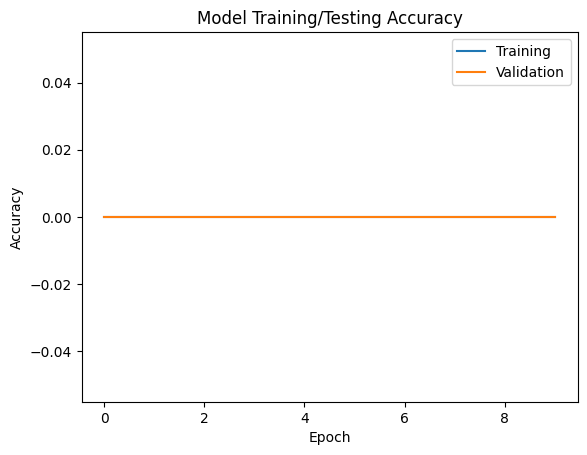

In [73]:
#Lets plot the accuracy of TRAINING and TESTING
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Training/Testing Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'])
plt.show()

Stay tuned for an updated model soon!